## Testes de Séries Temporais e ARIMA

Referências:
[Previsão de comportamento de ações com Machine Learning em Python  (tem material para previsão também!)](https://andre-kuniyoshi.medium.com/previs%C3%A3o-de-comportamento-de-a%C3%A7%C3%B5es-com-machine-learning-em-19ff4fef547a)

Abaixo serão testados alguns tópicos de séries temporais, plotação de gráfico e indicadores relevantes para uma previsão.

In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import  train_test_split

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox


In [2]:
!pip install -q yfinance
import yfinance as yf
!pip install --upgrade -q mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.5 MB/s eta 0:00:00


In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-01-06 21:36:14--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-06 21:36:15--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://deac-fra.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-06 21:36:15--  http://deac-fra.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving deac-fra.dl.s

In [4]:
# Preprando dados #
df = pd.read_csv('/content/drive/MyDrive/USP/PUB_MachineLearning/Dados/COTAHIST_B3/all_bovespa.csv', sep = ',')
df= df.sort_values(by = ['data_pregao'])
df['data_pragao'] = pd.to_datetime(df['data_pregao'], format = '%Y-%m-%d') # Formatando Datas
df_acao = df[df['sigla_acao'] == 'PETR4'] # Filtro de Ação (Petrobras)

In [5]:
 # Seleção de campos
df_acao_fec = df_acao[['data_pregao', 'preco_fechamento']]

# Ajuste de Index
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))

# Retirar coluna
df_acao_fec.drop('data_pregao', axis = 1, inplace = True)

# Média móvel artitimétia:

ma100 = df_acao_fec.rolling(35).mean()

# Média móvel exponencial:

# (...)

df_acao_fec

,preco_fechamento
2020-01-02,30.70
2020-01-03,30.45
2020-01-06,30.81
2020-01-07,30.69
2020-01-08,30.50
...,...
2022-09-14,31.12
2022-09-15,31.06
2022-09-16,30.78
2022-09-19,31.27


[]

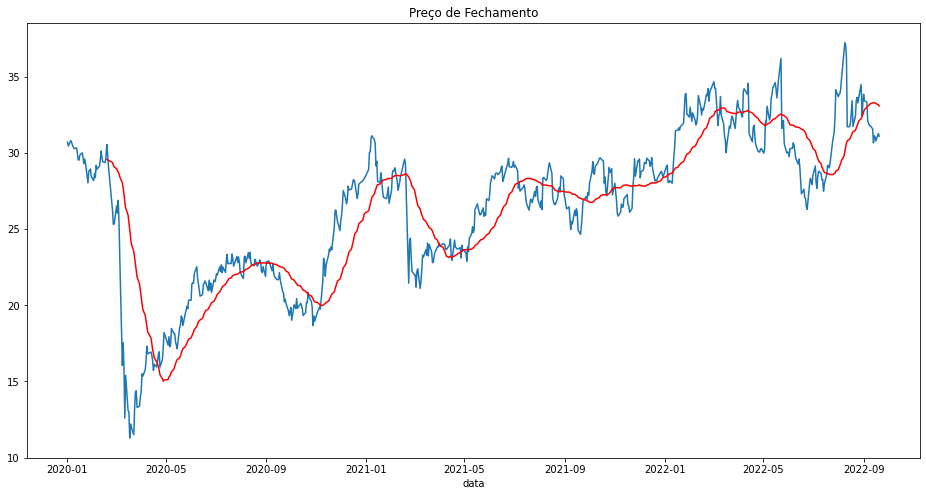

In [6]:
# Plotar informação
plt.figure(figsize = (16,8))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('data')
plt.plot(ma100, 'r')
plt.plot()

In [7]:
# Ajuste de Index
df_acao = df_acao.set_index(pd.DatetimeIndex(df_acao['data_pregao'].values))

df= df.sort_values(by = ['data_pregao'])

df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,data_pragao
2020-01-02,2020-01-02,PETR4,PETROBRAS,30.51,30.70,30.31,30.70,37774500.0,1.154777e+11,2020-01-02
2020-01-03,2020-01-03,PETR4,PETROBRAS,30.88,31.24,30.45,30.45,71595600.0,2.204408e+11,2020-01-03
2020-01-06,2020-01-06,PETR4,PETROBRAS,30.43,30.94,29.95,30.81,81844000.0,2.513704e+11,2020-01-06
2020-01-07,2020-01-07,PETR4,PETROBRAS,30.82,30.88,30.47,30.69,32822000.0,1.006116e+11,2020-01-07
2020-01-08,2020-01-08,PETR4,PETROBRAS,30.69,30.77,30.24,30.50,48215600.0,1.469849e+11,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
2022-09-14,2022-09-14,PETR4,PETROBRAS,30.75,31.43,30.63,31.12,49039700.0,1.525662e+11,2022-09-14
2022-09-15,2022-09-15,PETR4,PETROBRAS,30.92,31.23,30.80,31.06,45553200.0,1.412122e+11,2022-09-15
2022-09-16,2022-09-16,PETR4,PETROBRAS,30.86,30.95,30.34,30.78,107303600.0,3.290925e+11,2022-09-16
2022-09-19,2022-09-19,PETR4,PETROBRAS,30.50,31.38,29.88,31.27,65559900.0,2.027448e+11,2022-09-19


## ARIMA

Até aqui reutilizou-se os códigos de "RN.ipynb" para preparar os dados e montar a série. Apartir desse ponto serão testados alguns comportamentos de séries temporais e o modelo ARIMA.

Os principais pontos para utilizar o modelo ARIMA são:
* Sazonalidade
* Série estacionária — definição do parâmetro d
* Média Móvel
* Outliers
* Função de Autocorrelação Parcial (p)
* Função de Autocorrelação (q)


---



---


- AR: Autoregression, pois usa a relação de dependência entre uma observação e um número de lagged observations.
- I: Integrated, pois usa a diferenciação das observações crua para transformar a time series em estacionária.
- MA: Moving Average, pois usa a dependência entre uma observação e o erro residual proveniente de uma média móvel aplicada a lagged observations.

Links:
- [Time Series in Python — Exponential Smoothing and ARIMA processes](https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788)
- [Série Multivariada](https://towardsdatascience.com/transformer-unleashed-deep-forecasting-of-multivariate-time-series-in-python-9ca729dac019)

Começando pela **sazonalidade**, vamos analisar se ela existe para esse ativo. Para isso, precisamos agrupar a série em valores em certa periodicidade. Assim, define-se em 40, correspondente a aproximadamente 1 semana.

<ipython-input-8-4a7ed568f921>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_PETR4 = seasonal_decompose(df_acao_fec['preco_fechamento'],


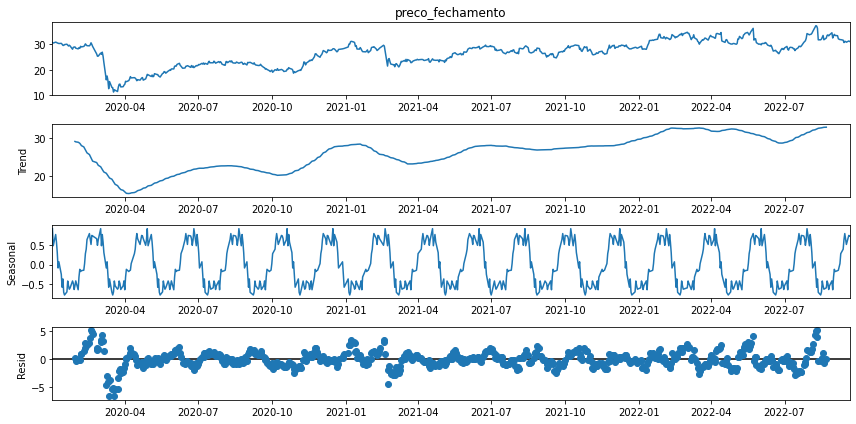

In [8]:
## Sazonalidade
# Decomposição mensal
decomposicao_PETR4 = seasonal_decompose(df_acao_fec['preco_fechamento'],
model='additive', freq=40)
fig = decomposicao_PETR4.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

Agora será testada, por meio do **teste de Dickey Fuller**, se a série é estacionaria, isto é, se a média e a variância são constantes com tempo.

In [9]:
"""
H0: Hipótese Nula, -> Série não estacionária (p-value > 0.05)
H1: Hipótese Alternativa -> Série estacionária (p-value <= 0.05) 
"""
# Verificando a Estacionariedade

test_estacionariedade = adfuller(df_acao_fec['preco_fechamento'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                            -2.434299
p-valor                           0.132289
Lags                              7.000000
Número de observações usadas    669.000000
Valor crítico(1%)                -3.440163
Valor crítico(5%)                -2.865870
Valor crítico(10%)               -2.569076
dtype: float64


O resultado estatístico mostrou que a série **não é estacionária**. (p-value > 0.05). Então, vamos utilizar a técnica de diferenciação para tornar a série estacionária.

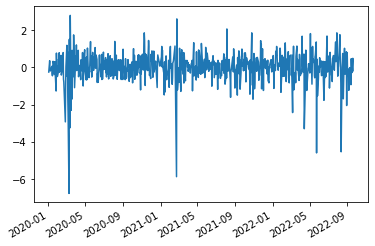

In [10]:
# Diferenciações

df_acao_fec['primeira_dif'] = df_acao_fec['preco_fechamento'].diff()
df_acao_fec['primeira_dif'].plot()

In [11]:
# Verificando a estacionariedade da série diferenciada
test_estacionariedade = adfuller(df_acao_fec['primeira_dif'].dropna())
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                          -8.367855e+00
p-valor                         2.712212e-13
Lags                            6.000000e+00
Número de observações usadas    6.690000e+02
Valor crítico(1%)              -3.440163e+00
Valor crítico(5%)              -2.865870e+00
Valor crítico(10%)             -2.569076e+00
dtype: float64


Aplicando novamente o teste de Dickey Fuller, verifica-se que com apenas uma diferenciação, a série se tornou estacionária. Assim, é possível definir o valor 1 para o parâmetro d do ARIMA.

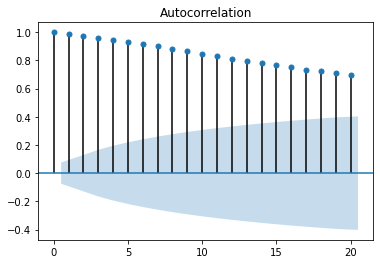

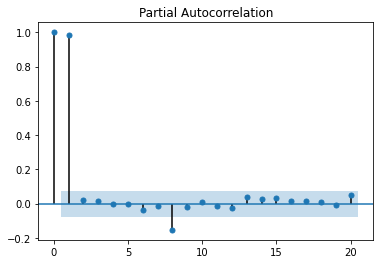

In [12]:
# Verificando as funções ACF (Função de Autocorrelação [q]) e PACF (Função de Autocorrelação Parcial [p])
acf = plot_acf(df_acao_fec['preco_fechamento'], lags = 20)
pacf = plot_pacf(df_acao_fec['preco_fechamento'], lags = 20)

q: valor onde a ACF (primeiro plot) cruza o limite superior do intervalo pela primeira vez, neste caso seria o 2 do eixo X.

p: valor onde o PACF (segundo plot) cruza o limite superior do intervalo pela primeira vez, neste caso seria também o 2 do eixo X

Agora o modelo ARIMA séra de order=(2,1,2) que seria oi valores de p,d,q.

In [13]:
# treinar o modelo ARIMA

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_acao_fec, order=(2,1,2))
result_AR = model.fit(disp = -1)

plt.figure(figsize = (16,8))
result_AR.plot_predict(start="2021-08-02", end="2022-02-02");

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

ValueError: ignored

## Principais Indicadores usados

Indicadores:
- Médias Móveis;
- RSI;
- Bandas de Bollinger;
- Suporte e Resistência;
- LTA e LTB;
- MACD;
 

### **Médias Móveis***

**Principais**:
- Média Móvel Aritimética;
- Média Móvel Exponencial;

(...)

### **Indicador RSI**

[Referência](https://www.valutrades.com/pt/blog/usando-o-oscilador-estoc%C3%A1stico-para-identificar-condi%C3%A7%C3%B5es-de-overbought-e-oversold#:~:text=Em%20um%20gr%C3%A1fico%20estoc%C3%A1stico%2C%20as%20leituras%20que%20caem,extremo%20de%20overbought%20ou%20oversold%2C%20ele%20ser%C3%A1%20revertido.)

O indicador RSI compara os ganhos recentes com as perdas recentes e possui variação de 0 a 100, onde qualquer ponto acima de 70 é considerado overbought e qualquer ponto abaixo de 30 é considerado oversold.. O calculo de RSI é:
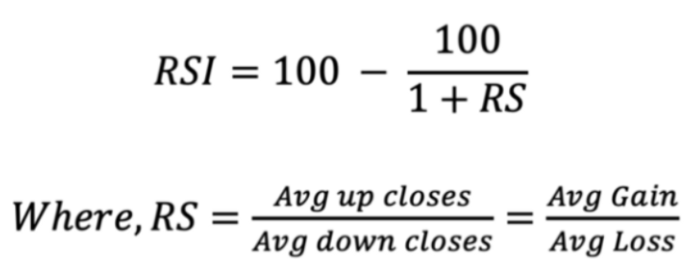

Ele é, portanto, um indicador de momentum (ímpeto) que compara a magnitude de ganhos recentes a perdas recentes numa tentativa de determinar condições de sobrecompra ou sobrevenda de um ativo.

**Utilização básica + variação simples**

RSI acima de 70 é considerado overbought indicando um sinal de venda. RSI abaixo do 30 é considerado oversold, o que implica num sinal de compra. Alguns traders um pouco mais conservadores esperam que o indicador RSI entre novamente dentro das faixas para efetuarem a entrada.

**Utilização do criador**

O criador do indicador de momentum RSI sugeria que o trader aguardasse falhas de swing para, então, entrar no mercado.

Uma falha que indica venda é quando o RSI chega na zona acima do 70, desce, tenta subir de novo e “não consegue” passar o nível anterior, formando um topo mais baixo.

Uma falha que indica a compra é quando o RSI chega na zona abaixo dos 30, sobe, desce novamente mas não consegue passar o nível anterior, formando um fundo mais alto.
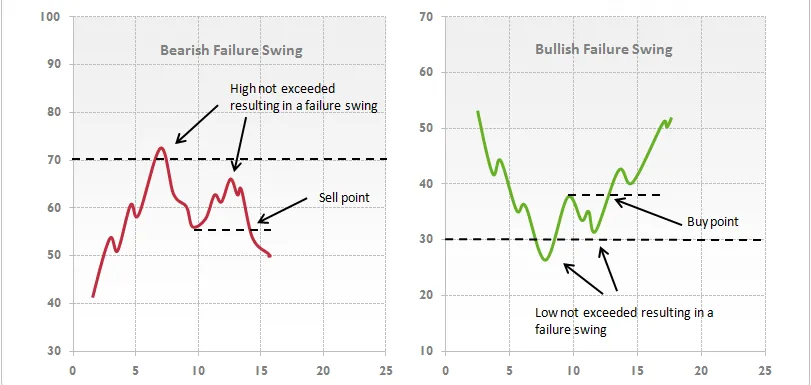

**Divergências**

Quando linhas de tendência de preço do instrumento divergem das linhas de tendência do indicador RSI isso pode ser um sinal de que a direção do ativo está prestes a mudar. 

In [ ]:
# (...)
RSI_PERIOD = 20 # definindo o período considerado para cálculo de RSI
df_acao_fec['rsi'] = talib.RSI(df_acao_fec['preco_fechamento'], RSI_PERIOD)  # criando a feature RSI
# RSI < 30 -> 0 (comprar)
# RSI > 70 -> 1 (vender)
# Else -> 2 (nada)
df_acao_fec['rsi_indicator'] = df_acao_fec['rsi'].apply(lambda x: 0 if x<30 else 1 if x>70 else 2) 
display(df_acao_fec[['preco_fechamento','rsi','rsi_indicator']].tail(15))

In [ ]:
df_acao_fec['rsi'].plot()

### **Indicador de Bollinger (ou Bandas de Bollinger)**

Bandas de bollinger é um indicador de volatilidade bastante utilizado para prever se um ativo está sobre-comprado, estável ou sobre-vendido. Ele formado por duas médias móveis, uma superior e outra inferior que indicam tal informação.

Atributos:
- Antever os níveis de preço de um ativo;
- Antecipar topos e fundos de preço no gráfico;
- Mostrar a intensidade de valorização ou desvalorização de um ativo.

As bandas são derivadas das médias móveis e mostram que, independente de qualquer movimento que o preço faça, ele tende a voltar a um equilíbrio. Portanto, temos aí um “estreitamento das bandas” no gráfico de candlestick.

**Fórmula para calcular as bandas, segundo Bollinger:**

- *Centro:* média móvel simples de 20 períodos (se período = dias, então: 20 dias)
- *Banda superior:* média móvel simples (20 períodos) + (2x desvio padrão de 20 dias)
- *Banda inferior*: média móvel simples (20 períodos) – (2x desvio padrão de 20 dias)

Quando o preço do ativo ultrapassa a banda superior, observamos uma tendência de **alta do ativo**. Por outro lado, se o preço fica abaixo da banda inferior, há então uma **tendência de baixa**.

Entretanto, deve-se ficar atento aos sinais de força dos ativos ao ultrapassar as bandas. Contudo, os mesmos tendem a perder força e inverter a tendência ao passo que rompem as bandas superior e inferior.

As bandas de bollinger funcionam bem para mercados que seguem tendências. Isso mostra que, se utilizadas para analisar ativos que fogem dessa premissa, podem não ser tão úteis.

--- 

Se o indicador é maior que 1, é uma indicação de venda (1). Caso seja menor que 0, então é sinal de compra (0).

O "bbp_indicator" = 2 significa o momento em que não se deve nem comprar e nem vender. 

In [ ]:
# (...)
# calculando a média móvel e limites superior e inferiror
# limites com base em 2 desvios padrão 
up, mid, low = talib.BBANDS(df_acao_fec['preco_fechamento'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# criando features para a média e os limites
df_acao_fec['upper'] = up
df_acao_fec['mid'] = mid
df_acao_fec['low'] = low
df_acao_fec['bbp'] = (df_acao_fec['preco_fechamento'] - df_acao_fec['low'])/(df_acao_fec['upper'] - df_acao_fec['low'])
df_acao_fec.dropna(inplace=True)
# bbp < 0 -> 0 (comprar)
# RSI > 1 -> 1 (vender)
# Else -> 2 (nada)
df_acao_fec['bbp_indicator'] = df_acao_fec['bbp'].apply(lambda x: 0 if x<0 else 1 if x>1 else 2) 
display(df_acao_fec[['preco_fechamento','bbp','bbp_indicator']].tail(15))


In [ ]:
df_acao_fec['bbp'].plot()

### **Suporte e resistência**

Os indicadores de Suporte e Resistência também são bastante utilizados na avaliação técnica de ações.

Resumidamente, uma linha de suporte por exemplo caracteriza um fundo, onde a pressão compradora demonstrou-se maior que a pressão vendedora em algum (ou vários) momento no passado. Por outro lado, uma linha de resistência caracteriza um topo, onde a pressão vendedora foi maior que a compradora.

Suporte e Resistência podem ser definidos através de, no mínimo, 3 candles. Dessa forma, serão criadas features de suporte e resistência, baseadas em 5 candles consecutivos.

[Teoria e código](https://quantbrasil.com.br/como-identificar-linhas-de-suporte-e-resistencia-utilizando-python)

Fractal é um padrão estabelecido por pelo menos 5 candles, onde o candle central (candle de sinal) apresenta máxima ou mínima maior do que os dois candles ao seu extremo.

Dessa forma, para estabelecer uma linha de resistência, o candle de sinal deve apresentar o maior valor de máxima, acompanhado por valores crescentes de máxima dos dois candles anterioes e valores decrescentes dos dois candles posteriores. A mesma ideia se aplica para estabelecer uma linha de Suporte.

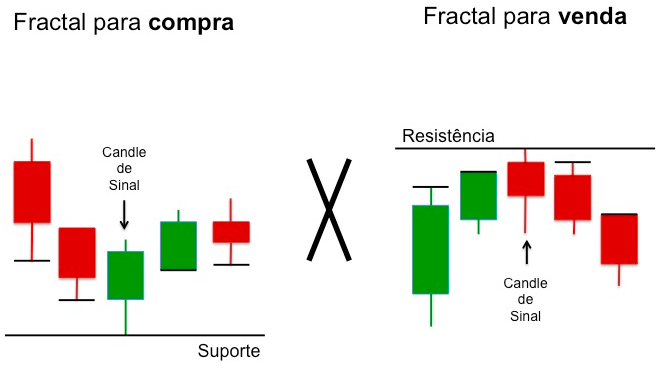

In [ ]:
df_acao.rename(columns = {'preco_abertura': "Open", 'preco_maximo': "High", 'preco_minimo': "Low", 'preco_fechamento': "Close"}, inplace = True)
start = '2021-01-01'
end = '2021-09-15'

**Criando as funções que identificarão os fractais**

Para identificar uma linha de resistência (_is_resistance_), o candle de sinal deverá ter máxima maior que o candle anterior (_i-1_) e porterior (_i+1_) a ele, assim como ambos deverão apresentar máxima maior que os candles de suas extremidades (_i-2_ e _i+2_, respectivamente). A mesma lógica se aplica para _is_support_.

In [ ]:
## Identificação dos Fractais
# definindo a função de resistencia
def is_resistance(df,i):
  resistance = (df['High'][i] > df['High'][i-1]
                and df['High'][i] > df['High'][i+1]
                and df['High'][i+1] > df['High'][i+2]
                and df['High'][i-1] > df['High'][i-2])
  return resistance


# definindo a função de suporte
def is_support(df,i):
  support = (df['Low'][i] < df['Low'][i-1]
             and df['Low'][i] < df['Low'][i+1]
             and df['Low'][i+1] < df['Low'][i+2]
             and df['Low'][i-1] < df['Low'][i-2])

  return support

**Posicionando as linhas de suporte e resistência**

Para traçar as linhas que representarão os pontos de suporte e resistência, será utilizado o parâmetro *alines* da função *mpf.plot*, que permite plotar linhas horizontais no gráfico.

O *alines* recebe um par de tuplas com coordenadas *(x, y)*, onde a primeira tupla representa o ponto de início da linha e a segunda tupla, o ponto final da linha. Nesse caso, o primeiro ponto será o dia onde o suporte ou resistência foi observado, e o último ponto será o último dia do nosso dataset.

In [ ]:
# coordinates is a list of a list of two tuples
# the first tuple has the signal candle's index as 1st argument and the price as 2nd
# the second tuple has the last index as 1st argument in order to draw the support/resistance 
# line till the end of the graph 

coordinates = []
for i in range(2, df_acao.shape[0] - 2):
  if is_support(df_acao, i):
    coordinates.append([
      (df_acao.index[i], df_acao['Low'][i]), # If support, plot a horizontal line from the low
      (max(df_acao.index),df_acao['Low'][i])
    ])
  elif is_resistance(df_acao, i):
    coordinates.append([
      (df_acao.index[i],df_acao['High'][i]), # If resistance, plot a horizontal line from the high
      (max(df_acao.index),df_acao['High'][i])
    ])

coordinates[:5]

**Plotando o gráfico com os suportes e resistências**

Como o objetivo é plotar um gráfico de candlestick e suas linhas horizontais, será chamada a função mpf.plot mais de uma vez para o mesmo gráfico *(ax2 = ax1.twinx())*.

Na primeira vez a função será para plotar o gráfico de candlestick (*type='candle'*) com o estilo yahoo, onde os candles que fecharam positivo são representados por verde e os que fecharam negativo, por vermelho.

Em seguida, itera-se sobre todas as coordenadas presentes em coordinates, a fim de plotar as linhas horizontas.

In [ ]:
def plot_all(coordinates):

  fig = mpf.figure(figsize=(16, 10))
  title = "Supports and Resistances: PETR4"
  ax1 = fig.subplot(title=title)
  ax2 = ax1.twinx()

  mpf.plot(df_acao,
           ax=ax1,
           style='yahoo',
           type='candle',
           ylabel='Price')

  for coordinate in coordinates:
    mpf.plot(df_acao, alines=(coordinate), ax=ax2)

plot_all(coordinates)

** Melhorando gráfico**

Se a diferença entre duas linhas, seja ela de suporte ou resistência, for menor que a média dos corpos dos candles, quer dizer que elas estão muito próximas entre si e pertencem à mesma zona.

In [ ]:
avg_candle_size =  np.mean(df_acao['High'] - df_acao['Low'])

def is_far_from_level(price, levels, delta): # Compara as distâncias das linhas
    """
    A função segue a seguinte lógica: Se o preço for menor que o avg_candle_size
    de pelo menos uma linha de suporte ou resistência (level),
    consideramos que os preços estão próximos e assim ele é descartado. 
    Por outro lado, caso o preço não esteja próximo o suficiente de nenhum 
    suporte ou resistência,esse preço será considerado distante e será 
    adicionado a lista no_noise_levels.
    """

    is_far = True
    for level in levels:
        if (abs(level - price) < delta):
            is_far = False
            break
    return is_far

no_noise_levels = []
coordinates = []

# We skip the first and the last 2 data points once we need at least 5 candles
# to form the patter
for i in range(2, df_acao.shape[0] - 2):

    if is_support(df_acao, i):
        price = df_acao['Low'][i]
        if is_far_from_level(price, no_noise_levels, avg_candle_size):
            no_noise_levels.append(price)
            coordinates.append([
                (df_acao.index[i], price), (max(df_acao.index), price)
            ])
            
    elif is_resistance(df_acao,i):
        price = df_acao['High'][i]
        if is_far_from_level(price, no_noise_levels, avg_candle_size):
            no_noise_levels.append(price)
            coordinates.append([
                (df_acao.index[i], price), (max(df_acao.index), price)
            ])

coordinates

In [ ]:
plot_all(coordinates)

### **LTA e LTB**

LTA e LTB são linhas de tendência de alta e de baixa, respectivamente, que indicam a direção dos movimentos de preço de um determinado ativo


---
---

Uma **LTA** corresponde à linha diagonal que liga fundos ascendentes no mínimo e tem como objetivo principal monitorar as tendências de alta do preço de determinado ativo. Entre as características capazes de ajudar a identificação de uma LTA estão:

grande inclinação ascendente;
funciona como suporte, sendo que quanto mais próximo o preço estiver da LTA, maior será a pressão compradora;
quanto mais fundos tocarem a LTA, mais a tendência de alta é significativa;
o rompimento da LTA para baixo, sinaliza a reversão da tendência atual.

Já uma **LTB** corresponde a uma linha diagonal que serve para ligar no mínimo dois topos em sentido descendente, que foram traçados a partir de nível mais alto da tendência. O objetivo principal é monitorar as tendências de baixa de determinado ativo. Entre as características que podem ajudar a identificação de uma LTB estão:

grande inclinação decrescente;
funciona como resistência, sendo que quanto mais próximo o preço estiver da LTB, maior será a pressão de venda;
quanto mais topos tocarem a LTB, mais a tendência de baixa é significativa;
o rompimento da LTB para cima, sinaliza a reversão da tendência atual.

---
---

De forma geral, as variáveis LTA e LTB dizem se, em determinado período de tempo, nossa série está subindo, caindo, ou andando horizontalmente.

As análises podem ter sensibilidades diferentes caso a tendência seja de alta ou de baixa, por isso essa variável pode ser interessante.

Para isso, será utilizado o método rolling com correlation do pandas. Nesse caso, foi defindo que correlações maiores que 0.5 são classificadas como tendência de alta, menos que -0.5 são tendência de baixa e o restante é a lateralidade.

In [ ]:
# (...)
df_acao_fec2 = df_acao_fec.reset_index()
df_acao_fec['corr'] = (df_acao_fec2['preco_fechamento'].rolling(20).corr(pd.Series(df_acao_fec2.index))).tolist()
df_acao_fec.dropna(inplace=True)
def condition(x):
    if x<=-0.5:
        return -1
    elif x>-0.5 and x<0.5:
        return 0
    else:
        return 1
df_acao_fec['corr_class'] = df_acao_fec['corr'].apply(condition)
# plotando os dois gráficos
sn.scatterplot(x = df_acao_fec.index,y = df_acao_fec['corr'])
sn.countplot(df_acao_fec['corr_class'])

Percebe-se que há mais idicação de alta do que baixa

### **MACD** **(Moving Average Convergence/Divergence)**

[Referência de código](https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b)

[Referência 2](https://www.alpharithms.com/calculate-macd-python-272222/)

O **MACD** é bastante eficiente para acompanhar tendências. Isso significa que ele demora para mostrar reversões nos preços ou oportunidades de compra e venda próximas aos fundos e topos, sua função primordial é simplesmente indicar o que está acontecendo, possibilitando que você fique junto com a tendência atual do mercado e por consequência minimize os riscos dos seus investimentos.

Tem três elementos principais:

- Média móvel exponencial de 26 dias do preço (média longa)
- Média móvel exponencial de 12 dias do preços (média curta)
- Média móvel exponencial de 9 dias do próprio MACD (chamada de linha de sinalização)

Agora, com os elementos, será calculado a linha do MACD. Para isso, basta subtrair a média móvel longa (26 dias) da média móvel curta (12 dias). O resultado será um número que irá oscilar em torno de zero

- **MACD maior que zero:** Neste caso a média móvel de 12 dias é maior que a média de 26, isso significa que as expectativas mais recentes são mais favoráveis para alta que as anteriores.

- **MACD menor que zero:** Neste cenário a média de 12 dias é menor que a de 26, mostrando um panorama mais relacionado a uma situação de baixa.

- **Sinal de compra:** Um sinal de compra é gerado sempre que o MACD cruza para cima sua linha de sinalização.

- **Sinal de venda:** É gerado sempre que o MACD cruza para baixo sua linha de sinalização.

Se um sinal de compra (venda) surgir próximo a uma região de venda (compra) excessiva, o indicativo é mais confiável do que se manifestado em áreas próximas ao nível zero.

**Vantagens:** Os vários sinais gerados por esse indicador são facilmente interpretados e podem ser incorporados a qualquer estratégia de trade de curto prazo.

**Desvantagens:**
- Incapacidade de efetuar comparações entre diferentes ativos;
- Pequenas mudanças podem causar uma rápida alteração de direção do indicador.

### **Nuvem de Ichimoku**

(...)
[Referência](https://github.com/Gabrielsldev/bitcoin_indicadores_tecnicos)

## Vizualização de dados

In [ ]:
# Gráfico com Candles
import plotly.graph_objects as go

fig = go.Figure(data=
                [go.Candlestick(x=df_acao['data_pregao'],
                open=df_acao['Open'],
                high=df_acao['High'],
                low=df_acao['Low'],
                close=df_acao['Close'])])

fig.show()

# Gráfico com os preços de fechamento, abertura, máximos e mínimo.

plt.figure(figsize = (16,8))
plt.plot(df_acao["Open"], 'm')
plt.plot(df_acao["High"], 'g')
plt.plot(df_acao["Low"], 'r')
plt.plot(df_acao["Close"], 'k')


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.ion()

figure, ax = plt.subplots(figsize=(8,6))
line1, = ax.plot(x, y)

plt.title("Dynamic Plot of sinx",fontsize=25)

plt.xlabel("X",fontsize=18)
plt.ylabel("sinX",fontsize=18)

for p in range(100):
    updated_y = np.cos(x-0.05*p)
    
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    figure.canvas.draw()
    
    figure.canvas.flush_events()
    time.sleep(0.1)